In [2]:
# Options Pricing and Greeks Analysis
# This notebook demonstrates how to price options and analyze their sensitivities using different models such as Black-Scholes, binomial trees, and Monte Carlo simulations. We will also explore the Greeks for better risk assessment.


In [2]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src') 

# Import custom modules
from black_scholes import black_scholes
from binomial_tree import binomial_tree
from monte_carlo import monte_carlo_asian
from greeks import calculate_greeks
from visualizations import plot_greeks

# Display plots inline
%matplotlib inline


In [3]:
## Setting Up Parameters Define the basic parameters for the option pricing models.
# Option parameters
S = 100      # Underlying asset price
K = 100      # Strike price
T = 1        # Time to maturity (in years)
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility of the underlying asset

print(f"Underlying price (S): {S}, Strike price (K): {K}, Time to maturity (T): {T} years, Risk-free rate (r): {r}, Volatility (σ): {sigma}")


Underlying price (S): 100, Strike price (K): 100, Time to maturity (T): 1 years, Risk-free rate (r): 0.05, Volatility (σ): 0.2


In [4]:
## Black-Scholes Model / Calculating the price of a European call and put option using the Black-Scholes formula.


In [5]:
# Pricing European call and put options using Black-Scholes
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Black-Scholes Call Option Price: {call_price:.2f}")
print(f"Black-Scholes Put Option Price: {put_price:.2f}")


Black-Scholes Call Option Price: 10.45
Black-Scholes Put Option Price: 5.57


In [6]:
## Binomial Tree Model / Pricing a European and American call option using a binomial tree approach.


In [7]:
# Pricing European and American options using the binomial tree
euro_call_price = binomial_tree(S, K, T, r, sigma, steps=100, option_type='call')
amer_call_price = binomial_tree(S, K, T, r, sigma, steps=100, option_type='call', american=True)

print(f"European Call Option Price (Binomial Tree): {euro_call_price:.2f}")
print(f"American Call Option Price (Binomial Tree): {amer_call_price:.2f}")


European Call Option Price (Binomial Tree): 10.43
American Call Option Price (Binomial Tree): 10.43


In [8]:
## Monte Carlo Simulation / Estimating the price of an Asian call option using Monte Carlo simulations.


In [9]:
# Pricing an Asian call option using Monte Carlo simulation
asian_call_price = monte_carlo_asian(S, K, T, r, sigma)
print(f"Asian Call Option Price (Monte Carlo): {asian_call_price:.2f}")


Asian Call Option Price (Monte Carlo): 5.81


In [10]:
## Greeks Calculation Evaluating the Greeks (Delta, Gamma, Vega, Theta, Rho) for risk management.


In [11]:
# Calculate and display Greeks
greeks = calculate_greeks(S, K, T, r, sigma, option_type='call')
print("Greeks for Call Option:")
for greek, value in greeks.items():
    print(f"{greek}: {value:.4f}")


Greeks for Call Option:
Delta: 0.6369
Gamma: 0.0188
Vega: 37.5245
Theta: -6.4169
Rho: 53.2392


In [12]:
## Visualization of Greeks / Visualizing how the Greeks change with respect to the underlying asset price.


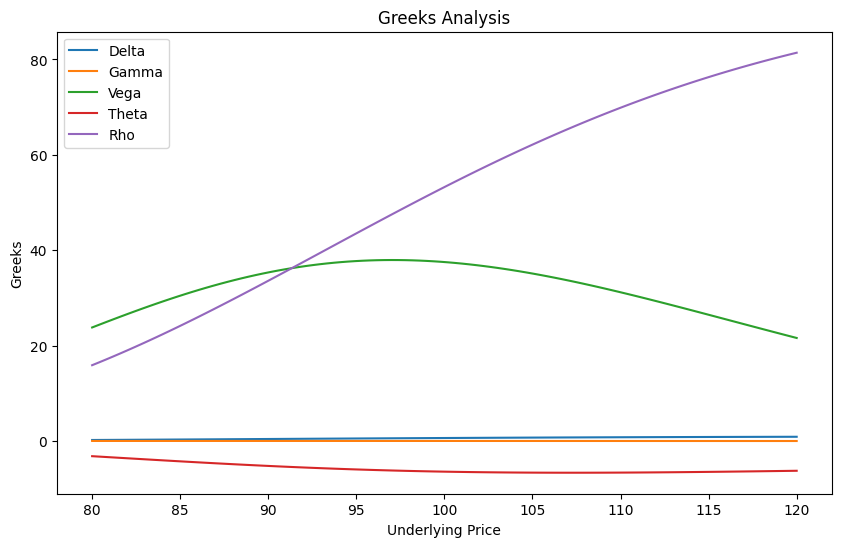

In [13]:
# Plot Greeks
plot_greeks(S, K, T, r, sigma, option_type='call')


Asian Call Option Price (Monte Carlo): 5.74


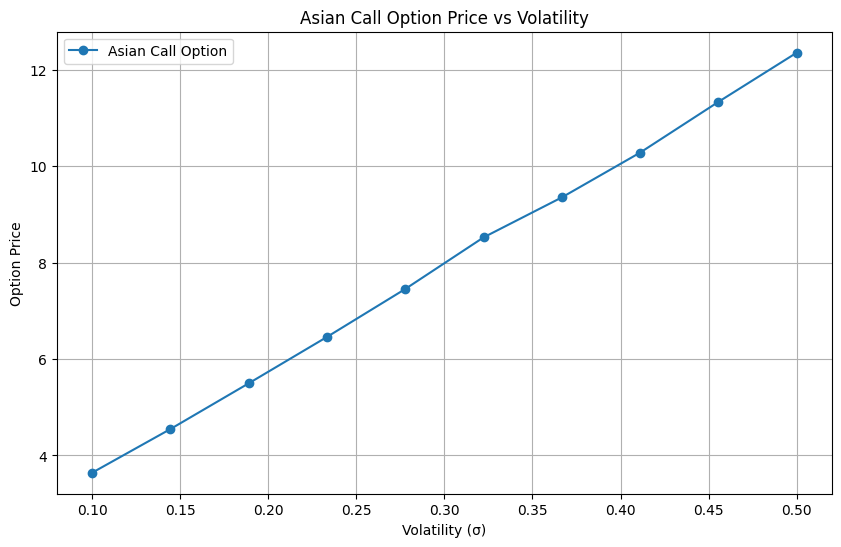

In [14]:

from monte_carlo_asian import monte_carlo_asian_option  

# Parameters
S = 100      # Current price of the underlying asset
K = 100      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free interest rate (5%)
volatilities = np.linspace(0.1, 0.5, 10)  # Volatility range from 10% to 50%

asian_call_prices = []

# Calculate the price of the Asian call option under different volatilities
for sigma in volatilities:
    price = monte_carlo_asian_option(S, K, T, r, sigma, simulations=100000, option_type='call')
    asian_call_prices.append(price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(volatilities, asian_call_prices, marker='o', label='Asian Call Option')
plt.title('Asian Call Option Price vs Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.show()


In [15]:
from monte_carlo_barrier import monte_carlo_barrier_option  

barrier = 120  # Example barrier level for an up-and-out option
barrier_call_prices = []

# Calculate the price of the barrier call option under different volatilities
for sigma in volatilities:
    price = monte_carlo_barrier_option(S, K, T, r, sigma, barrier, simulations=100000, option_type='call', barrier_type='up-and-out')
    barrier_call_prices.append(price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(volatilities, barrier_call_prices, marker='o', label='Barrier Call Option (Up-and-Out)')
plt.title('Barrier Call Option Price vs Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'S' is not defined